# Scraping Data from Sofascore with BeautifulSoup


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
response= requests.get('https://www.sofascore.com/bayer-04-leverkusen-fc-bayern-munchen/xdbsGdb#id:11396298',
                      headers ={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'})

In [6]:
response.status_code

200

In [7]:
soup= BeautifulSoup(response.text,'html.parser')

In [8]:
soup.select('div[class="sc-fqkvVR fVuJXd"]')

[]

In [15]:
response = requests.get('https://api.sofascore.com/api/v1/event/11396298/statistics', headers=headers)

In [16]:
response.status_code

200

In [17]:
stats=response.json()

In [18]:
stats

{'statistics': [{'period': 'ALL',
   'groups': [{'groupName': 'Expected',
     'statisticsItems': [{'name': 'Expected goals',
       'home': '1.32',
       'away': '0.56',
       'compareCode': 1,
       'statisticsType': 'positive',
       'valueType': 'event',
       'homeValue': 1.32,
       'awayValue': 0.56}]},
    {'groupName': 'Possession',
     'statisticsItems': [{'name': 'Ball possession',
       'home': '39%',
       'away': '61%',
       'compareCode': 2,
       'statisticsType': 'positive',
       'valueType': 'event',
       'homeValue': 39,
       'awayValue': 61}]},
    {'groupName': 'Shots',
     'statisticsItems': [{'name': 'Total shots',
       'home': '14',
       'away': '9',
       'compareCode': 1,
       'statisticsType': 'positive',
       'valueType': 'event',
       'homeValue': 14,
       'awayValue': 9},
      {'name': 'Shots on target',
       'home': '8',
       'away': '1',
       'compareCode': 1,
       'statisticsType': 'positive',
       'valueType':

# Converting the Data into Pandas DataFrame

In [161]:
data=[]
for period_stats in stats['statistics']:
    period = period_stats['period']
    for group in period_stats['groups']:
        group_name = group['groupName']
        for item in group['statisticsItems']:
            item_name = item['name']
            home_value = item['homeValue']
            away_value = item['awayValue']
            data.append([period, group_name,item_name,home_value,away_value])
df = pd.DataFrame(data, columns=['Period', 'Group Name','Item Name', 'Home Value', 'Away Value'])
print(df)

   Period  Group Name         Item Name  Home Value  Away Value
0     ALL    Expected    Expected goals        1.32        0.56
1     ALL  Possession   Ball possession       39.00       61.00
2     ALL       Shots       Total shots       14.00        9.00
3     ALL       Shots   Shots on target        8.00        1.00
4     ALL       Shots  Shots off target        3.00        5.00
..    ...         ...               ...         ...         ...
93    2ND       Duels         Duels won       24.00       32.00
94    2ND       Duels       Aerials won        7.00       10.00
95    2ND   Defending           Tackles        6.00       10.00
96    2ND   Defending     Interceptions        5.00        7.00
97    2ND   Defending        Clearances       18.00        2.00

[98 rows x 5 columns]


In [162]:
df.head()

,Period,Group Name,Item Name,Home Value,Away Value
0,ALL,Expected,Expected goals,1.32,0.56
1,ALL,Possession,Ball possession,39.00,61.00
2,ALL,Shots,Total shots,14.00,9.00
3,ALL,Shots,Shots on target,8.00,1.00
4,ALL,Shots,Shots off target,3.00,5.00


In [163]:
y = df.to_csv('LevBay.csv')

In [164]:
df = pd.read_csv('LevBay.csv')

In [165]:
df

,Unnamed: 0,Period,Group Name,Item Name,Home Value,Away Value
0,0,ALL,Expected,Expected goals,1.32,0.56
1,1,ALL,Possession,Ball possession,39.00,61.00
2,2,ALL,Shots,Total shots,14.00,9.00
3,3,ALL,Shots,Shots on target,8.00,1.00
4,4,ALL,Shots,Shots off target,3.00,5.00
...,...,...,...,...,...,...
93,93,2ND,Duels,Duels won,24.00,32.00
94,94,2ND,Duels,Aerials won,7.00,10.00
95,95,2ND,Defending,Tackles,6.00,10.00
96,96,2ND,Defending,Interceptions,5.00,7.00


# Cleaning Data

In [166]:
df=df.drop(['Unnamed: 0'], axis=1)
df

,Period,Group Name,Item Name,Home Value,Away Value
0,ALL,Expected,Expected goals,1.32,0.56
1,ALL,Possession,Ball possession,39.00,61.00
2,ALL,Shots,Total shots,14.00,9.00
3,ALL,Shots,Shots on target,8.00,1.00
4,ALL,Shots,Shots off target,3.00,5.00
...,...,...,...,...,...
93,2ND,Duels,Duels won,24.00,32.00
94,2ND,Duels,Aerials won,7.00,10.00
95,2ND,Defending,Tackles,6.00,10.00
96,2ND,Defending,Interceptions,5.00,7.00


In [167]:
df = df.query('Period== "ALL"')
df

,Period,Group Name,Item Name,Home Value,Away Value
0,ALL,Expected,Expected goals,1.32,0.56
1,ALL,Possession,Ball possession,39.00,61.00
2,ALL,Shots,Total shots,14.00,9.00
3,ALL,Shots,Shots on target,8.00,1.00
4,ALL,Shots,Shots off target,3.00,5.00
5,ALL,Shots,Blocked shots,3.00,3.00
6,ALL,TVData,Corner kicks,4.00,6.00
7,ALL,TVData,Offsides,3.00,1.00
8,ALL,TVData,Fouls,13.00,13.00
9,ALL,TVData,Yellow cards,3.00,2.00


In [168]:
df = df.query('`Group Name` not in ["TVData","Shots extra","Shots"]')
df

,Period,Group Name,Item Name,Home Value,Away Value
0,ALL,Expected,Expected goals,1.32,0.56
1,ALL,Possession,Ball possession,39.00,61.00
23,ALL,Passes,Passes,419.00,653.00
24,ALL,Passes,Accurate passes,344.00,579.00
25,ALL,Passes,Long balls,16.00,12.00
26,ALL,Passes,Crosses,4.00,2.00
27,ALL,Duels,Dribbles,7.00,11.00
28,ALL,Duels,Possession lost,115.00,125.00
29,ALL,Duels,Duels won,44.00,58.00
30,ALL,Duels,Aerials won,13.00,15.00


# Preparing Data to plot Radar Chart

In [169]:
params = df['Item Name'].tolist()
params

['Expected goals',
 'Ball possession',
 'Passes',
 'Accurate passes',
 'Long balls',
 'Crosses',
 'Dribbles',
 'Possession lost',
 'Duels won',
 'Aerials won',
 'Tackles',
 'Interceptions',
 'Clearances']

In [170]:
import pandas as pd

# Assuming df is your DataFrame
ranges = []

for index, row in df.iterrows():
    home_value = row['Home Value'] * 0.25  # Decrease home value by 25%
    away_value = row['Away Value'] * 1.25  # Increase away value by 25%
    ranges.append((home_value, away_value))

print("Ranges:", ranges)






Ranges: [(0.33, 0.7000000000000001), (9.75, 76.25), (104.75, 816.25), (86.0, 723.75), (4.0, 15.0), (1.0, 2.5), (1.75, 13.75), (28.75, 156.25), (11.0, 72.5), (3.25, 18.75), (3.25, 25.0), (2.75, 17.5), (5.25, 12.5)]


In [171]:
h_value = df['Home Value'].tolist()
h_value

[1.32, 39.0, 419.0, 344.0, 16.0, 4.0, 7.0, 115.0, 44.0, 13.0, 13.0, 11.0, 21.0]

In [172]:
a_value = df['Away Value'].tolist()
a_value

[0.56,
 61.0,
 653.0,
 579.0,
 12.0,
 2.0,
 11.0,
 125.0,
 58.0,
 15.0,
 20.0,
 14.0,
 10.0]

In [173]:
values = [h_value, a_value]
print('values=', values)

values= [[1.32, 39.0, 419.0, 344.0, 16.0, 4.0, 7.0, 115.0, 44.0, 13.0, 13.0, 11.0, 21.0], [0.56, 61.0, 653.0, 579.0, 12.0, 2.0, 11.0, 125.0, 58.0, 15.0, 20.0, 14.0, 10.0]]


# Plotting Radar Chart

In [174]:
from soccerplots.radar_chart import Radar

In [175]:
title = dict(
        title_name=' Bayer 04Levurkusen',
        title_color='Red',
        title_name_2='Bayern Munich',
        title_color_2='Blue',
        title_fontsize=18)

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

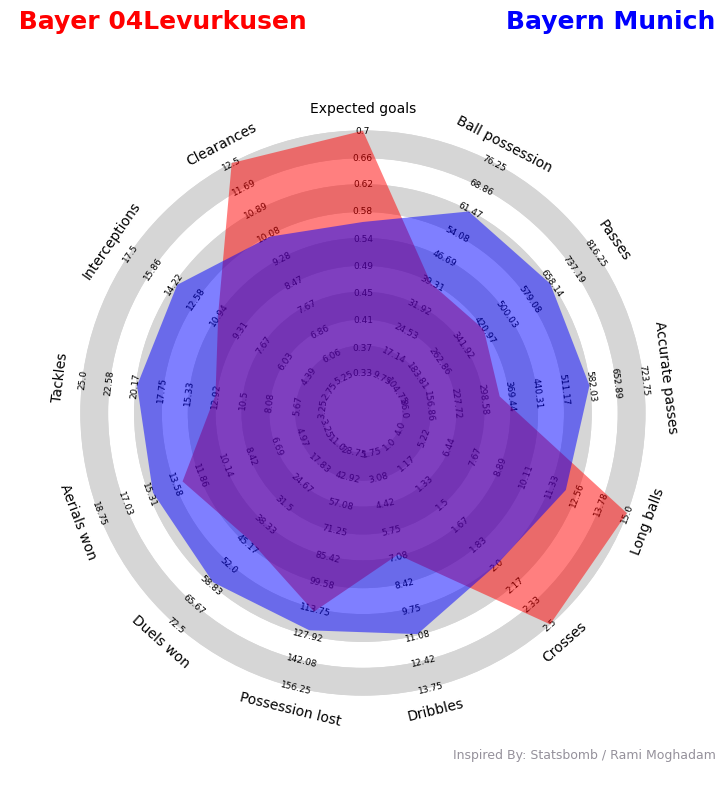

In [176]:
radar = Radar()
fig, ax = radar.plot_radar(params=params,ranges =ranges,values=values,
                          radar_color=['Red','Blue'], alphas=[.50,.50],title=title, compare = True)